In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

### Load data

In [2]:
meteo = pd.read_csv('meteo+num_of_earthquakes_seisan.txt')

In [3]:
meteo.head(2)

,date,num_of_earthquakes,air_pressure_sea_level_GPa,heigt_of_snow_cm
0,2016-08-01,0,1004.4,0
1,2016-08-02,0,998.9,0


### Add column with datetime date format

In [4]:
date_format = pd.to_datetime(meteo['date'])
meteo['date_format'] = date_format

### Plot number of earthquakes per day

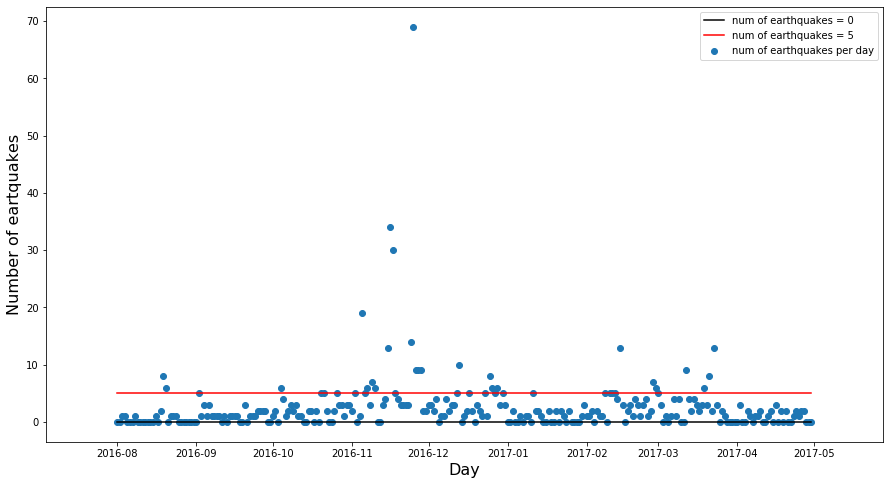

<Figure size 1080x576 with 0 Axes>

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.figure(figsize=(15,8))
ax.scatter(meteo['date_format'], meteo['num_of_earthquakes'], label='num of earthquakes per day')
ax.plot(meteo['date_format'], [0] * len(meteo), c='black', label='num of earthquakes = 0' )
ax.plot(meteo['date_format'], [5] * len(meteo), c='red', label='num of earthquakes = 5' )
ax.set_xlabel('Day', fontsize=16)
ax.set_ylabel('Number of eartquakes', fontsize=16)
legend = ax.legend()
legend.get_frame()
plt.show()

### Plot number of days with certain number of earthquakes

In [7]:
num = meteo.num_of_earthquakes.unique()
num.sort()

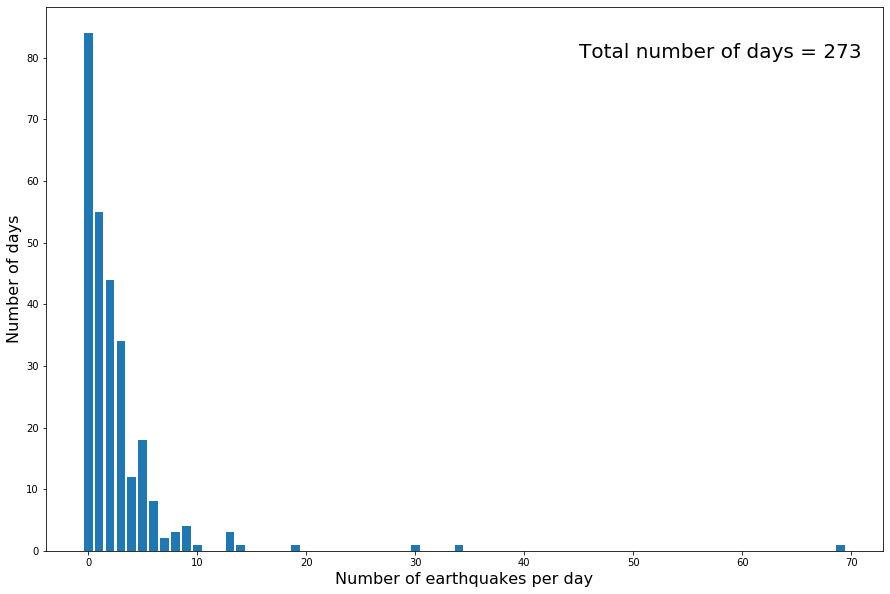

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(num, meteo.groupby('num_of_earthquakes').count()['date'])
ax.set_xlabel('Number of earthquakes per day', fontsize=16)
ax.set_ylabel('Number of days', fontsize=16)
ax.text(45, 80, 'Total number of days = 273', fontsize=20)
plt.show()

### Based on the first and second figures we can say, that it's really rare when  there are a lot of earthquakes per day (i.e. 5 events and more). So, it's important to inverstigate the reasons why it ca happen.

### Plot meteo data and number of earthquakes per day

Text(0.5, 0, 'Day')

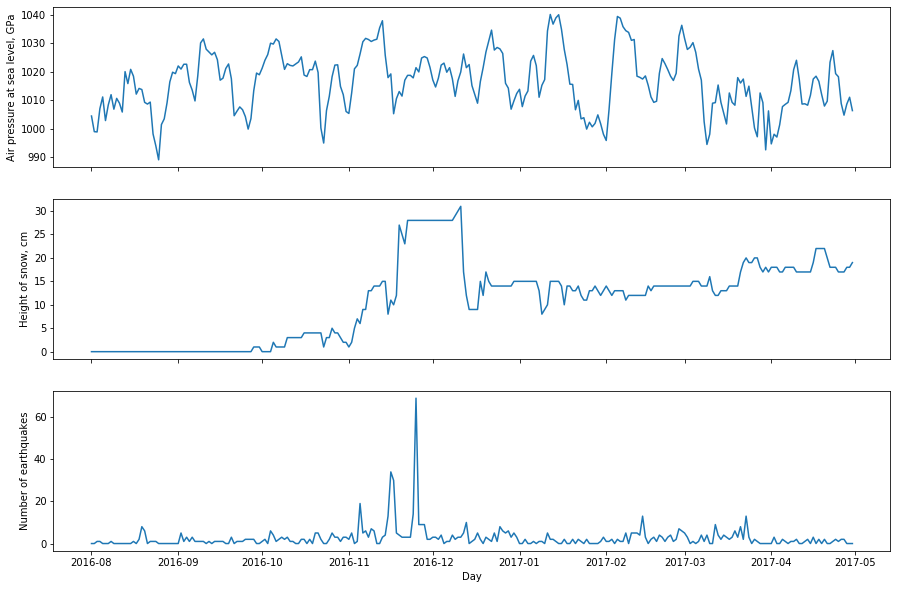

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15, 10))
ax[0].plot(meteo.date_format, meteo.air_pressure_sea_level_GPa)
ax[0].set_ylabel('Air pressure at sea level, GPa')
ax[1].plot(meteo.date_format, meteo.heigt_of_snow_cm)
ax[1].set_ylabel('Height of snow, cm')
ax[2].plot(meteo.date_format, meteo.num_of_earthquakes)
ax[2].set_ylabel('Number of earthquakes')
ax[2].set_xlabel('Day')

### Based on the last figure we can conclude the following:
### 1. There is no obvious dependence between air pressure and number of earthquakes per day. (constantly changing pressure(every day) does not have enough time to cause a strong increase in the number of earthquakes)
### 2.Also, we can make a suggestion that extra pressure staying the same for a few days can cause the increment in the number of earthquakes(3 picks in November)). 
### 3. The lower extra pressure staying constant(or increasing really slowly) can cause the increment in the number of earthquakes when  the higher pressure changing rapidly  can't cause the same effect. 